# Exploratory Data Analysis of Collisions Merged with SDOT

#### Rebecca Stewart

### Please Note: This dataset was posted by Erin Friday Evening (8/7/2020) - it has since been updated with a new one.
Just a quick look a new featuers and overlap of existing features.

## Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown

In [2]:
# Run this cell to display all output within each cell in Jupyter Notebook, 
# instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##  Read the data into a dataframe


In [3]:
# To read a CSV file from the web

url = "../data/seattle_collisions_merged_from_sdot_wsdot.csv"
rdf = pd.read_csv(url, parse_dates=["INCDTTM"])

____

In [4]:
df = rdf.copy()

In [5]:
df.head()

,longitude,latitude,REPORTNO,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER_x,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,COLLISION_TIME,JURISDICTION,INDEXED PRIMARY TRAFFICWAY,PRIMARY TRAFFICWAY,DATE,YEAR,QTR #,MONTH,FULL TIME,MOST SEVERE SOBRIETY TYPE,MOST SEVERE INJURY TYPE,TOTAL CRASHES,FATAL CRASHES,SERIOUS INJURY CRASHES,EVIDENT INJURY CRASHES,POSSIBLE INJURY CRASHES,PDO - NO INJURY CRASHES,TOTAL FATALITIES,TOTAL SERIOUS INJURIES,...,VEH 2 MV DRIVER SEQUENCE 1,HIT & RUN,NON-REPORTABLE,TARGET ZERO Reportable Indicator,TZ Work Zone Related Collision Indicator,TZ Intersection Related Collision Indicator,TZ Wrong Way Vehicle Indicator,TZ Wrong Way Vehicle Count,TZ Alcohol Impaired Involved Person Indicator,TZ Alcohol Impaired Involved Person Count,TZ Drug Impaired Involved Person Indicator,TZ Drug Impaired Involved Person Count,TZ Impaired Involved Person Indicator,TZ Impaired Involved Person Count,TZ Drinking Involved Person Indicator,TZ Drinking Involved Person Count,TZ Speeding Driver Indicator,TZ Speeding Driver Count,TZ Distracted Driver Indicator,TZ Distracted Driver Count,TZ Unrestrained Occupant Indicator,TZ Unrestrained Occupant Count,TZ Unlicensed Driver Indicator,TZ Unlicensed Driver Count,TZ Drowsy Driver Indicator,TZ Drowsy Driver Count,TZ Run Off The Road Indicator,TZ Non Junction Opposite Direction Crash Indicator,TZ Lane Departure Indicator,TZ MV Driver 16 To 25 Years Involved Person Indicator,TZ MV Driver 16 To 25 Years Involved Person Count,TZ MV Driver 65 Plus Years Involved Person Indicator,TZ MV Driver 65 Plus Years Involved Person Count,TZ MV Driver 70 Plus Years Involved Person Indicator,TZ MV Driver 70 Plus Years Involved Person Count,TZ Wildlife Involved Indicator,TZ Motorcycle Collision Indicator,TZ Total Motorcycles Involved Count,TZ School Bus Involved Indicator,TZ School Bus Involved Count,TZ Heavy Vehicle Crash Indicator,TZ Heavy Vehicle Crash Count,TZ Vehicle Train Crash Indicator,TZ Catostrophic Event Indicator,TZ Fatal Crash Indicator,TZ Fatality Count,TZ Suspected Serious Injury Crash Indicator,TZ Suspected Serious Injury Count,TZ Pedestrian Involved Indicator,TZ Pedacyclist Involved Indicator
0,-122.328526,47.703180,EA09347,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,Unknown,10,Entering at angle,0,0,N,13:28:00,State Route,005P117188R,005P117188R,1/5/2020,2020,Q1,Jan,1:28 PM,NaN,No Apparent Injury,1,0,0,0,0,1,0,0,...,NaN,No,Reportable,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-122.320383,47.539432,3857045,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020-02-13 08:12:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,Unknown,11,From same direction - both going straight - bo...,0,0,N,08:12:00,City Street,ELLIS AVE S,ELLIS AVE S,2/13/2020,2020,Q1,Feb,8:12 AM,NaN,No Apparent Injury,1,0,0,0,0,1,0,0,...,NaN,Yes,Reportable,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-122.346793,47.662069,EA05985,Block,NaN,N 46TH ST BETWEEN PHINNEY TURN RD AND GREEN LA...,1,Property Damage Only Collision,Unknown,2,0,0,2,0,0,0,2020-01-21 08:48:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Overcast,Wet,Daylight,Unknown,23,From same direction - all others,0,0,N,08:48:00,City Street,N 46TH ST,N 46TH ST,1/21/2020,2020,Q1,Jan,8:48 AM,NaN,No Apparent Injury,1,0,0,0,0,1,0,0,...,NaN,No,Reportable,1,0,0,0,0,0,0,0,0,0,0,0,

## What is the shape/size of this new dataframe?

Start to review the new columns. What kind of info do they contain? Is there any redundant info?

In [6]:
df.shape


(157302, 135)

In [9]:
# LIST OF ORIGINAL COLUMNS 

orig_columns = ['longitude', 'latitude', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']

# SOME OF THESE MAY HAVE BEEN REMOVED, SO THE FOLLOWING WILL NARROW THE LIST
curr_orig_columns = [col for col in orig_columns if col in df.columns]
print(curr_orig_columns)

['longitude', 'latitude', 'REPORTNO', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


### List of New Features

In [10]:
new_columns = [col for col in df.columns if col not in curr_orig_columns]
print(new_columns)

['WEATHER_x', 'COLLISION_TIME', 'JURISDICTION', 'INDEXED PRIMARY TRAFFICWAY', 'PRIMARY TRAFFICWAY', 'DATE', 'YEAR', 'QTR #', 'MONTH', 'FULL TIME', 'MOST SEVERE SOBRIETY TYPE', 'MOST SEVERE INJURY TYPE', 'TOTAL CRASHES', 'FATAL CRASHES', 'SERIOUS INJURY CRASHES', 'EVIDENT INJURY CRASHES', 'POSSIBLE INJURY CRASHES', 'PDO - NO INJURY CRASHES', 'TOTAL FATALITIES', 'TOTAL SERIOUS INJURIES', 'TOTAL EVIDENT INJURIES', 'TOTAL POSSIBLE INJURIES', 'TOTAL VEHICLES', 'TOTAL PEDESTRIANS INVOLVED', 'TOTAL BICYCLISTS INVOLVED', 'FIRST COLLISION TYPE / OBJECT STRUCK', 'JUNCTION RELATIONSHIP', 'WEATHER_y', 'ROAD SURFACE CONDITIONS', 'LIGHTING CONDITIONS', 'History/Suspense Ind', 'FIRST IMPACT LOCATION (City St, County Rd & Misc 2010 forward, State Routes indefinite)', 'VEH 1 TYPE', 'VEH 1 MAKE', 'VEH 1 MODEL', 'VEH 1 STYLE', 'VEH 1 ACTION', 'VEH 1 COMPASS DIRECTION FROM', 'VEH 1 COMPASS DIRECTION TO', 'VEH 1 TRAFFIC CONTROL', 'VEH 1 POSTED SPEED', 'VEH 1 CONDITION 1', 'VEH 2 TYPE', 'VEH 2 MAKE', 'VEH 2

#### LET'S BREAK THESE DOWN INTO MULTIPLE CATEGORIES AND EXAMINE EACH GROUP INDEPENDENT OF THE OTHERS

In [11]:
veh_info_cols = ['VEH 1 TYPE', 'VEH 1 MAKE', 'VEH 1 MODEL', 'VEH 1 STYLE', 'VEH 1 ACTION', 'VEH 1 COMPASS DIRECTION FROM', 'VEH 1 COMPASS DIRECTION TO', 'VEH 1 TRAFFIC CONTROL', 'VEH 1 POSTED SPEED', 'VEH 1 CONDITION 1', 'VEH 1 MV DRIVER AGE', 'VEH 1 MV DRIVER GENDER', 'VEH 1 MV DRIVER INJURY TYPE', 'VEH 1 MV DRIVER CONTRIBUTING CIRCUMSTANCE 1', 'VEH 1 MV DRIVER RESTRAINT', 'VEH 1 MV DRIVER EJECTION', 'VEH 1 MV DRIVER SEQUENCE 1']

veh_2_info_cols = [ 'VEH 2 TYPE', 'VEH 2 MAKE', 'VEH 2 MODEL', 'VEH 2 STYLE', 'VEH 2 ACTION', 'VEH 2 MV DRIVER CONTRIBUTING CIRCUMSTANCE 1', 'VEH 2 MV DRIVER SEQUENCE 1']

In [12]:
tz_ohe_cols = [col for col in new_columns if col.startswith('TZ')]

In [14]:
therest_new_cols = [col for col in new_columns if col not in veh_info_cols and col not in tz_ohe_cols]
therest_new_cols

['WEATHER_x',
 'COLLISION_TIME',
 'JURISDICTION',
 'INDEXED PRIMARY TRAFFICWAY',
 'PRIMARY TRAFFICWAY',
 'DATE',
 'YEAR',
 'QTR #',
 'MONTH',
 'FULL TIME',
 'MOST SEVERE SOBRIETY TYPE',
 'MOST SEVERE INJURY TYPE',
 'TOTAL CRASHES',
 'FATAL CRASHES',
 'SERIOUS INJURY CRASHES',
 'EVIDENT INJURY CRASHES',
 'POSSIBLE INJURY CRASHES',
 'PDO - NO INJURY CRASHES',
 'TOTAL FATALITIES',
 'TOTAL SERIOUS INJURIES',
 'TOTAL EVIDENT INJURIES',
 'TOTAL POSSIBLE INJURIES',
 'TOTAL VEHICLES',
 'TOTAL PEDESTRIANS INVOLVED',
 'TOTAL BICYCLISTS INVOLVED',
 'FIRST COLLISION TYPE / OBJECT STRUCK',
 'JUNCTION RELATIONSHIP',
 'WEATHER_y',
 'ROAD SURFACE CONDITIONS',
 'LIGHTING CONDITIONS',
 'History/Suspense Ind',
 'FIRST IMPACT LOCATION (City St, County Rd & Misc 2010 forward, State Routes indefinite)',
 'HIT & RUN',
 'NON-REPORTABLE',
 'TARGET ZERO Reportable Indicator']

### Compare features that seem to have similar values to ones we already had

In [59]:
df[['FIRST COLLISION TYPE / OBJECT STRUCK', 'ST_COLDESC' ]].head(10)

,FIRST COLLISION TYPE / OBJECT STRUCK,ST_COLDESC
0,Entering at angle,Entering at angle
1,From same direction - both going straight - bo...,From same direction - both going straight - bo...
2,From same direction - all others,From same direction - all others
3,From same direction - both going straight - on...,From same direction - both going straight - on...
4,Bridge Rail - Face,Fixed object
5,From same direction - both going straight - on...,From same direction - both going straight - on...
6,Tree or Stump (stationary),Fixed object
7,From same direction - both going straight - bo...,From same direction - both going straight - bo...
8,From same direction - both going straight - on...,From same direction - both going straight - on...
9,One parked--one moving,One parked--one moving


In [60]:
# Look pretty similar except those where vehicle hit a fixed object, let's look at those that are different

df_mismatch = df[df['FIRST COLLISION TYPE / OBJECT STRUCK'] != df['ST_COLDESC']]
print(df_mismatch.shape)
df_mismatch[['FIRST COLLISION TYPE / OBJECT STRUCK', 'ST_COLDESC' ]].head(25)


(11647, 135)


,FIRST COLLISION TYPE / OBJECT STRUCK,ST_COLDESC
4,Bridge Rail - Face,Fixed object
6,Tree or Stump (stationary),Fixed object
26,Tree or Stump (stationary),Fixed object
38,Crash Cushions - Impact Attenuators,Fixed object
48,Utility Pole,Fixed object
60,Bridge Rail - Face,Fixed object
71,Utility Box,Fixed object
76,Concrete Barrier/Jersey Barrier - Face,Fixed object
78,Metal Sign Post,Fixed object
82,Tree or Stump (stationary),Fixed object


In [47]:

df.groupby(['MOST SEVERE SOBRIETY TYPE', 'UNDERINFL']).size().reset_index().rename(columns={0:'count'})

,MOST SEVERE SOBRIETY TYPE,UNDERINFL,count
0,HBD - Ability Impaired,N,146
1,HBD - Ability Impaired,Y,6126
2,HBD - Ability Impaired (tox test),N,1
3,HBD - Ability Impaired (tox test),Y,30
4,HBD - Ability Not Impaired,N,46
5,HBD - Ability Not Impaired,Y,951
6,HBD - Ability Not Impaired (tox test),Y,17
7,HBD - Sobriety Unknown,N,32
8,HBD - Sobriety Unknown,Y,895
9,Had NOT Been Drinking,N,89774


In [22]:
df.groupby(['WEATHER_x','WEATHER_y']).size().reset_index().rename(columns={0:'count'})

,WEATHER_x,WEATHER_y,count
0,Clear,Clear,861
1,Clear,Clear or Partly Cloudy,92593
2,Fog/Smog/Smoke,Fog or Smog or Smoke,467
3,Overcast,Overcast,23004
4,Overcast,Partly Cloudy,7
5,Overcast,Unknown,1
6,Raining,Clear or Partly Cloudy,1
7,Raining,Overcast,1
8,Raining,Raining,28153
9,Snowing/Hailing,Sleet or Hail or Freezing Rain,98


In [48]:


df.groupby(['MOST SEVERE INJURY TYPE','SEVERITYDESC']).size().reset_index().rename(columns={0:'count'})

,MOST SEVERE INJURY TYPE,SEVERITYDESC,count
0,Dead at Scene,Fatality Collision,96
1,Dead on Arrival,Fatality Collision,21
2,Died in Hospital,Fatality Collision,167
3,Died in Hospital,Injury Collision,1
4,No Apparent Injury,Fatality Collision,1
5,No Apparent Injury,Property Damage Only Collision,101151
6,Possible Injury,Injury Collision,36084
7,Possible Injury,Property Damage Only Collision,1
8,Suspected Minor Injury,Fatality Collision,1
9,Suspected Minor Injury,Injury Collision,14913


In [49]:

df.groupby(['ROAD SURFACE CONDITIONS','ROADCOND']).size().reset_index().rename(columns={0:'count'})

,ROAD SURFACE CONDITIONS,ROADCOND,count
0,Dry,Dry,104094
1,Dry,Wet,2
2,Ice,Ice,989
3,Oil,Oil,39
4,Other,Unknown,99
5,Sand/Mud/Dirt,Sand/Mud/Dirt,49
6,Snow/Slush,Snow/Slush,839
7,Standing Water,Standing Water,88
8,Unknown,Unknown,10717
9,Wet,Wet,40301


In [50]:
df.groupby(['LIGHTING CONDITIONS','LIGHTCOND']).size().reset_index().rename(columns={0:'count'})

,LIGHTING CONDITIONS,LIGHTCOND,count
0,Dark - Unknown Lightin,Dark - Unknown Lighting,13
1,Dark-No Street Lights,Dark - No Street Lights,1259
2,Dark-Street Lights Off,Dark - Street Lights Off,1004
3,Dark-Street Lights On,Dark - Street Lights On,41759
4,Dawn,Dawn,2088
5,Daylight,Dark - Street Lights On,1
6,Daylight,Daylight,96110
7,Daylight,Unknown,1
8,Dusk,Dusk,4841
9,Other,Unknown,141


In [55]:

df.groupby(['JUNCTION RELATIONSHIP','JUNCTIONTYPE']).size().reset_index().rename(columns={0:'count'})

,JUNCTION RELATIONSHIP,JUNCTIONTYPE,count
0,At Driveway,At Intersection (but not related to intersection),18
1,At Driveway,At Intersection (intersection related),210
2,At Driveway,Driveway Junction,5798
3,At Driveway,Mid-Block (but intersection related),129
4,At Driveway,Mid-Block (not related to intersection),3032
5,At Driveway,Ramp Junction,1
6,At Driveway,Unknown,65
7,At Driveway but Not Related,At Intersection (intersection related),9
8,At Driveway but Not Related,Driveway Junction,69
9,At Driveway but Not Related,Mid-Block (but intersection related),16


### Examine new features in groups - show % missing, total unique, either the first 5 values or value counts

In [ ]:
#vehicle_only_labels = [label  for label in df['st_coldesc'].dropna().unique() if label.startswith('From') or label.startswith('From op')     ]


In [ ]:
def show_info_on_subset_of_cols(list_of_cols):
    df_temp = df[list_of_cols]
    col_na = round(100*(df_temp.isna().sum()/len(df_temp)), 2)
    col_nunique = df_temp.nunique()
    df_summary = pd.DataFrame({"data_type": df_temp.dtypes,
                           "%_missing_vals": col_na,
                           "total_unique": col_nunique}).sort_values(by=["%_missing_vals"],
                                                                            ascending=False)
    
    print(df_summary.head(25))
    
    for col in list_of_cols:
        num_unique = df_temp[[col]].nunique()
        print("-"*20)
        if num_unique[0]<15:
            print(df_temp[[col]].value_counts())
        else:
            print(df_temp[[col]].head(5))
        
    

#### 'JURISDICTION', 'INDEXED PRIMARY TRAFFICWAY', 'PRIMARY TRAFFICWAY

In [52]:
show_info_on_subset_of_cols(['JURISDICTION', 'INDEXED PRIMARY TRAFFICWAY', 'PRIMARY TRAFFICWAY'])

                           data_type  %_missing_vals  total_unique
INDEXED PRIMARY TRAFFICWAY    object            0.02          5146
JURISDICTION                  object            0.00             3
PRIMARY TRAFFICWAY            object            0.00          5557
--------------------
JURISDICTION            
City Street                 140256
State Route                  17024
Miscellaneous Trafficway        22
dtype: int64
--------------------
  INDEXED PRIMARY TRAFFICWAY
0                005P117188R
1                ELLIS AVE S
2                  N 46TH ST
3            W SEATTLE BRG E
4                         99
--------------------
  PRIMARY TRAFFICWAY
0        005P117188R
1        ELLIS AVE S
2          N 46TH ST
3    W SEATTLE BRG E
4                 99


#### 'UNDERINFL','MOST SEVERE SOBRIETY TYPE', 'MOST SEVERE INJURY TYPE', 'TOTAL CRASHES'
#### 'FATAL CRASHES', 'SERIOUS INJURY CRASHES', 'EVIDENT INJURY CRASHES', 'POSSIBLE INJURY CRASHES'

In [46]:

cols = ['UNDERINFL','MOST SEVERE SOBRIETY TYPE', 'MOST SEVERE INJURY TYPE', 'TOTAL CRASHES', 'FATAL CRASHES', 'SERIOUS INJURY CRASHES', 'EVIDENT INJURY CRASHES', 'POSSIBLE INJURY CRASHES']
show_info_on_subset_of_cols(cols)

                          data_type  %_missing_vals  total_unique
MOST SEVERE SOBRIETY TYPE    object            4.91             8
UNDERINFL                    object            0.00             2
MOST SEVERE INJURY TYPE      object            0.00             8
TOTAL CRASHES                 int64            0.00             1
FATAL CRASHES                 int64            0.00             2
SERIOUS INJURY CRASHES        int64            0.00             2
EVIDENT INJURY CRASHES        int64            0.00             2
POSSIBLE INJURY CRASHES       int64            0.00             2
--------------------
UNDERINFL
N            148973
Y              8329
dtype: int64
--------------------
MOST SEVERE SOBRIETY TYPE            
Had NOT Been Drinking                    89945
Unknown                                  51291
HBD - Ability Impaired                    6272
HBD - Ability Not Impaired                 997
HBD - Sobriety Unknown                     927
Had NOT Been Drinking (tox t

#### FIRST COLLISION TYPE / OBJECT STRUCK','JUNCTION RELATIONSHIP', 'History/Suspense Ind'
####  'FIRST IMPACT LOCATION (City St, County Rd & Misc 2010 forward, State Routes indefinite)'
####  'HIT & RUN',  'NON-REPORTABLE',  'TARGET ZERO Reportable Indicator'

In [56]:
cols = ['FIRST COLLISION TYPE / OBJECT STRUCK','JUNCTION RELATIONSHIP', 'History/Suspense Ind',
 'FIRST IMPACT LOCATION (City St, County Rd & Misc 2010 forward, State Routes indefinite)',
 'HIT & RUN',  'NON-REPORTABLE',  'TARGET ZERO Reportable Indicator']
show_info_on_subset_of_cols(cols)

                                                   data_type  %_missing_vals  \
FIRST IMPACT LOCATION (City St, County Rd & Mis...    object           34.53   
FIRST COLLISION TYPE / OBJECT STRUCK                  object            0.00   
JUNCTION RELATIONSHIP                                 object            0.00   
History/Suspense Ind                                  object            0.00   
HIT & RUN                                             object            0.00   
NON-REPORTABLE                                        object            0.00   
TARGET ZERO Reportable Indicator                       int64            0.00   

                                                    total_unique  
FIRST IMPACT LOCATION (City St, County Rd & Mis...            89  
FIRST COLLISION TYPE / OBJECT STRUCK                         118  
JUNCTION RELATIONSHIP                                         14  
History/Suspense Ind                                           2  
HIT & RUN               

#### Features that start with VEH 1

In [62]:
veh_1_info_cols = ['VEH 1 TYPE', 'VEH 1 MAKE', 'VEH 1 MODEL', 'VEH 1 STYLE', 'VEH 1 ACTION', 'VEH 1 COMPASS DIRECTION FROM', 'VEH 1 COMPASS DIRECTION TO', 'VEH 1 TRAFFIC CONTROL', 'VEH 1 POSTED SPEED', 'VEH 1 CONDITION 1', 'VEH 1 MV DRIVER AGE', 'VEH 1 MV DRIVER GENDER', 'VEH 1 MV DRIVER INJURY TYPE', 'VEH 1 MV DRIVER CONTRIBUTING CIRCUMSTANCE 1', 'VEH 1 MV DRIVER RESTRAINT', 'VEH 1 MV DRIVER EJECTION', 'VEH 1 MV DRIVER SEQUENCE 1']
show_info_on_subset_of_cols(veh_1_info_cols)


                                            data_type  %_missing_vals  \
VEH 1 MV DRIVER AGE                           float64           30.79   
VEH 1 MV DRIVER GENDER                         object           29.45   
VEH 1 POSTED SPEED                            float64           22.41   
VEH 1 MODEL                                    object           21.93   
VEH 1 MAKE                                     object           17.24   
VEH 1 STYLE                                    object           15.55   
VEH 1 MV DRIVER EJECTION                       object           12.59   
VEH 1 MV DRIVER RESTRAINT                      object           10.23   
VEH 1 MV DRIVER INJURY TYPE                    object            9.50   
VEH 1 COMPASS DIRECTION FROM                   object            8.48   
VEH 1 COMPASS DIRECTION TO                     object            8.19   
VEH 1 CONDITION 1                              object            6.58   
VEH 1 MV DRIVER SEQUENCE 1                     obje

#### Features that start with VEH 2

In [63]:
veh_2_info_cols = [ 'VEH 2 TYPE', 'VEH 2 MAKE', 'VEH 2 MODEL', 'VEH 2 STYLE', 'VEH 2 ACTION', 'VEH 2 MV DRIVER CONTRIBUTING CIRCUMSTANCE 1', 'VEH 2 MV DRIVER SEQUENCE 1']
show_info_on_subset_of_cols(veh_2_info_cols)

                                            data_type  %_missing_vals  \
VEH 2 MV DRIVER CONTRIBUTING CIRCUMSTANCE 1    object           31.14   
VEH 2 MODEL                                    object           18.98   
VEH 2 MV DRIVER SEQUENCE 1                     object           16.49   
VEH 2 MAKE                                     object           15.56   
VEH 2 STYLE                                    object           15.43   
VEH 2 TYPE                                     object           14.49   
VEH 2 ACTION                                   object           14.49   

                                             total_unique  
VEH 2 MV DRIVER CONTRIBUTING CIRCUMSTANCE 1            44  
VEH 2 MODEL                                          1568  
VEH 2 MV DRIVER SEQUENCE 1                             16  
VEH 2 MAKE                                            202  
VEH 2 STYLE                                           120  
VEH 2 TYPE                                             

#### First set of Features that start with TARGET ZERO

In [64]:


tz_cols_set1=['TARGET ZERO Reportable Indicator', 'TZ Work Zone Related Collision Indicator', 'TZ Intersection Related Collision Indicator', 'TZ Wrong Way Vehicle Indicator', 'TZ Wrong Way Vehicle Count']
tz_cols_set2=['TZ Alcohol Impaired Involved Person Indicator', 'TZ Alcohol Impaired Involved Person Count', 'TZ Drug Impaired Involved Person Indicator', 'TZ Drug Impaired Involved Person Count', 'TZ Impaired Involved Person Indicator', 'TZ Impaired Involved Person Count', 'TZ Drinking Involved Person Indicator', 'TZ Drinking Involved Person Count']
tz_cols_set3=['TZ Speeding Driver Indicator', 'TZ Speeding Driver Count', 'TZ Distracted Driver Indicator', 'TZ Distracted Driver Count', 'TZ Unrestrained Occupant Indicator', 'TZ Unrestrained Occupant Count', 'TZ Unlicensed Driver Indicator', 'TZ Unlicensed Driver Count', 'TZ Drowsy Driver Indicator', 'TZ Drowsy Driver Count', 'TZ Run Off The Road Indicator', 'TZ Non Junction Opposite Direction Crash Indicator', 'TZ Lane Departure Indicator']
tz_cols_set4=['TZ MV Driver 16 To 25 Years Involved Person Indicator', 'TZ MV Driver 16 To 25 Years Involved Person Count', 'TZ MV Driver 65 Plus Years Involved Person Indicator', 'TZ MV Driver 65 Plus Years Involved Person Count', 'TZ MV Driver 70 Plus Years Involved Person Indicator', 'TZ MV Driver 70 Plus Years Involved Person Count']
tz_cols_set5=['TZ Wildlife Involved Indicator', 'TZ Motorcycle Collision Indicator', 'TZ Total Motorcycles Involved Count', 'TZ School Bus Involved Indicator', 'TZ School Bus Involved Count', 'TZ Heavy Vehicle Crash Indicator', 'TZ Heavy Vehicle Crash Count', 'TZ Vehicle Train Crash Indicator', 'TZ Catostrophic Event Indicator', 'TZ Fatal Crash Indicator', 'TZ Fatality Count', 'TZ Suspected Serious Injury Crash Indicator', 'TZ Suspected Serious Injury Count', 'TZ Pedestrian Involved Indicator', 'TZ Pedacyclist Involved Indicator']

show_info_on_subset_of_cols(tz_cols_set1)


                                            data_type  %_missing_vals  \
TARGET ZERO Reportable Indicator                int64             0.0   
TZ Work Zone Related Collision Indicator        int64             0.0   
TZ Intersection Related Collision Indicator     int64             0.0   
TZ Wrong Way Vehicle Indicator                  int64             0.0   
TZ Wrong Way Vehicle Count                      int64             0.0   

                                             total_unique  
TARGET ZERO Reportable Indicator                        2  
TZ Work Zone Related Collision Indicator                2  
TZ Intersection Related Collision Indicator             2  
TZ Wrong Way Vehicle Indicator                          2  
TZ Wrong Way Vehicle Count                              2  
--------------------
TARGET ZERO Reportable Indicator
1                                   157077
0                                      225
dtype: int64
--------------------
TZ Work Zone Related Collis

#### Second set of Features that start with TARGET ZERO

In [65]:
show_info_on_subset_of_cols(tz_cols_set2)

                                              data_type  %_missing_vals  \
TZ Alcohol Impaired Involved Person Indicator     int64             0.0   
TZ Alcohol Impaired Involved Person Count         int64             0.0   
TZ Drug Impaired Involved Person Indicator        int64             0.0   
TZ Drug Impaired Involved Person Count            int64             0.0   
TZ Impaired Involved Person Indicator             int64             0.0   
TZ Impaired Involved Person Count                 int64             0.0   
TZ Drinking Involved Person Indicator             int64             0.0   
TZ Drinking Involved Person Count                 int64             0.0   

                                               total_unique  
TZ Alcohol Impaired Involved Person Indicator             2  
TZ Alcohol Impaired Involved Person Count                 5  
TZ Drug Impaired Involved Person Indicator                2  
TZ Drug Impaired Involved Person Count                    3  
TZ Impaired In

#### Third set of Features that start with TARGET ZERO

In [66]:
show_info_on_subset_of_cols(tz_cols_set3)

                                                   data_type  %_missing_vals  \
TZ Speeding Driver Indicator                           int64             0.0   
TZ Speeding Driver Count                               int64             0.0   
TZ Distracted Driver Indicator                         int64             0.0   
TZ Distracted Driver Count                             int64             0.0   
TZ Unrestrained Occupant Indicator                     int64             0.0   
TZ Unrestrained Occupant Count                         int64             0.0   
TZ Unlicensed Driver Indicator                         int64             0.0   
TZ Unlicensed Driver Count                             int64             0.0   
TZ Drowsy Driver Indicator                             int64             0.0   
TZ Drowsy Driver Count                                 int64             0.0   
TZ Run Off The Road Indicator                          int64             0.0   
TZ Non Junction Opposite Direction Crash

#### Forth set of Features that start with TARGET ZERO

In [67]:
show_info_on_subset_of_cols(tz_cols_set4)

                                                   data_type  %_missing_vals  \
TZ MV Driver 16 To 25 Years Involved Person Ind...     int64             0.0   
TZ MV Driver 16 To 25 Years Involved Person Count      int64             0.0   
TZ MV Driver 65 Plus Years Involved Person Indi...     int64             0.0   
TZ MV Driver 65 Plus Years Involved Person Count       int64             0.0   
TZ MV Driver 70 Plus Years Involved Person Indi...     int64             0.0   
TZ MV Driver 70 Plus Years Involved Person Count       int64             0.0   

                                                    total_unique  
TZ MV Driver 16 To 25 Years Involved Person Ind...             2  
TZ MV Driver 16 To 25 Years Involved Person Count              5  
TZ MV Driver 65 Plus Years Involved Person Indi...             2  
TZ MV Driver 65 Plus Years Involved Person Count               4  
TZ MV Driver 70 Plus Years Involved Person Indi...             2  
TZ MV Driver 70 Plus Years Involved P

#### Fifth set of Features that start with TARGET ZERO

In [68]:
show_info_on_subset_of_cols(tz_cols_set5)

                                            data_type  %_missing_vals  \
TZ Wildlife Involved Indicator                  int64             0.0   
TZ Motorcycle Collision Indicator               int64             0.0   
TZ Total Motorcycles Involved Count             int64             0.0   
TZ School Bus Involved Indicator                int64             0.0   
TZ School Bus Involved Count                    int64             0.0   
TZ Heavy Vehicle Crash Indicator                int64             0.0   
TZ Heavy Vehicle Crash Count                    int64             0.0   
TZ Vehicle Train Crash Indicator                int64             0.0   
TZ Catostrophic Event Indicator                 int64             0.0   
TZ Fatal Crash Indicator                        int64             0.0   
TZ Fatality Count                               int64             0.0   
TZ Suspected Serious Injury Crash Indicator     int64             0.0   
TZ Suspected Serious Injury Count               int

## A subset of some numeric columns of interest


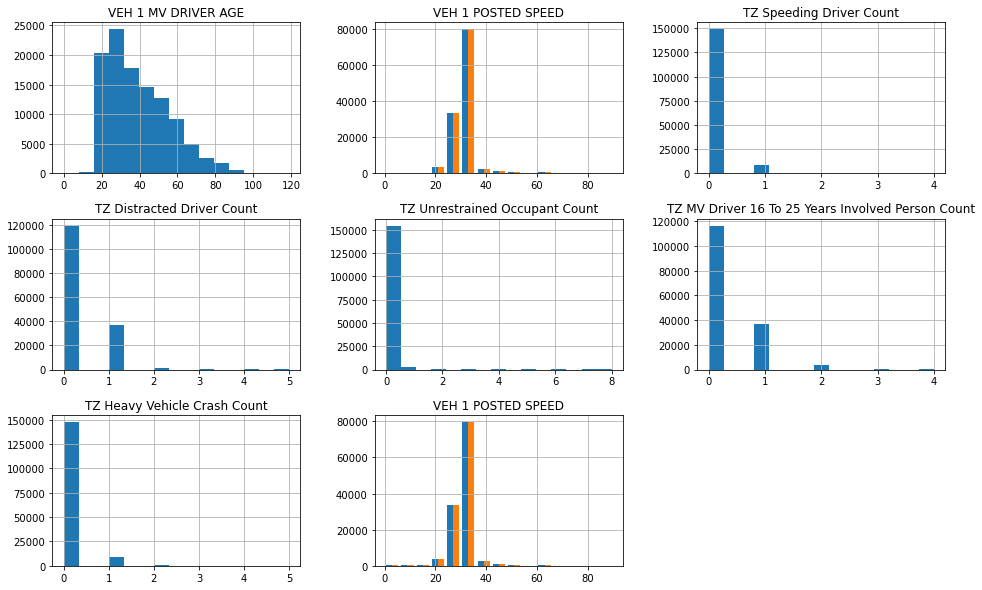

In [81]:
df_num = df[["VEH 1 MV DRIVER AGE", "VEH 1 POSTED SPEED", "TZ Speeding Driver Count",
              "TZ Distracted Driver Count", "TZ Unrestrained Occupant Count", "TZ MV Driver 16 To 25 Years Involved Person Count",
            "TZ Heavy Vehicle Crash Count", "VEH 1 POSTED SPEED"]]
df_num.hist(bins=15, figsize=(16, 10), layout=(3, 3));

## A subset of non-numeric columns of interest

Few interesting categorical features

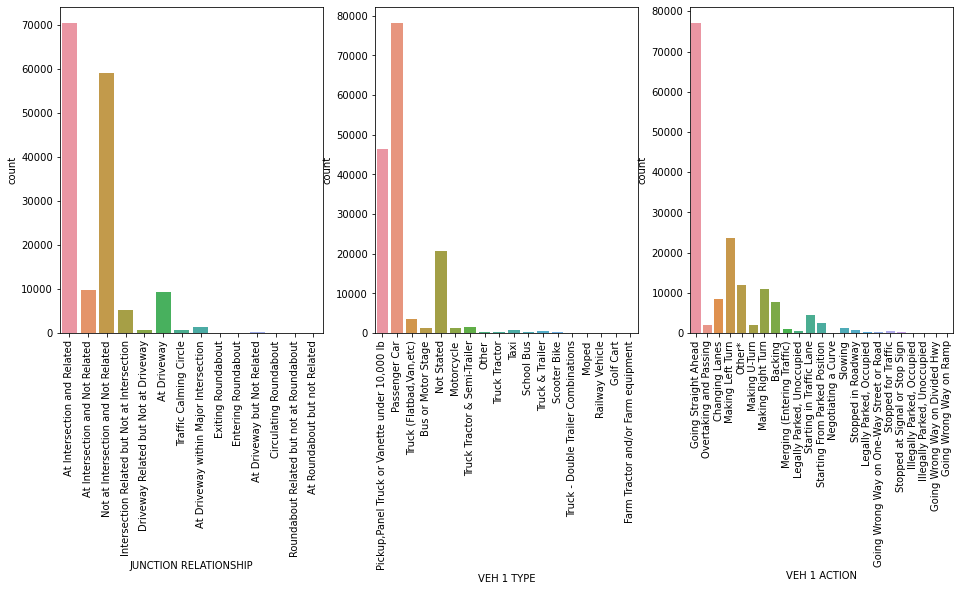

In [85]:
external_vars = ['JUNCTION RELATIONSHIP','VEH 1 TYPE','VEH 1 ACTION']

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for variable, subplot in zip(external_vars, ax.flatten()):
    _ = sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

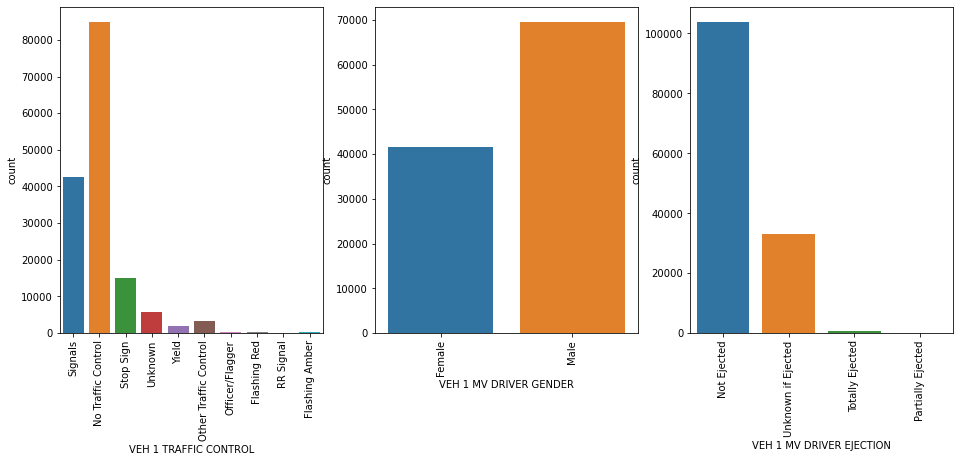

In [87]:
external_vars = ['VEH 1 TRAFFIC CONTROL',  'VEH 1 MV DRIVER GENDER', 'VEH 1 MV DRIVER EJECTION']

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for variable, subplot in zip(external_vars, ax.flatten()):
    _ = sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Summary

This new dataset, which is merged with SDOT data, that Erin posted friday night, has many of the new features are quite similar to the ones we had, although including a bit more detail.  For example, one includes info on the actual ‘Fixed Object’ that was hit for those types of collisions (utility pole, traffic island, curb, etc.)

Some new info that may be valuable in analysis includes; driver demographics, vehicle info (type/make/model), vehicle action (going straight, passing, changing lanes, etc.), posted speed,   Junction Relationship, Hit & Run

Also, Jeny posted this note in slack about how to deal with inconsistent weather values;

Interesting. We could move 0 and 1 into 1 group. Leave 2 alone. 3, 4 and 5 together as overcast. 8 alone. 9 and 10 to freezing inclement weather. 11 and 12 to unknown. 13 leave alone?  Don’t know about 6 and 7, but there are only 2 of them.
